In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  s3fs
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 200 kB of archives.
After this operation, 557 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 s3fs amd64 1.82-1 [200 kB]
Fetched 200 kB in 0s (685 kB/s)
Selecting previously unselected package s3fs.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../archives/s3fs_1.82-1_amd64.deb ...
Unpacking s3fs (1.82-1) ...
Setting up s3fs (1.82-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!mkdir /content/s3
!s3fs um2ii-datasets /content/s3

In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics
import matplotlib.pyplot as plt

MIMIC Age Validation on VinDr-PCXR Dataset

In [ ]:
test_df = pd.read_csv('/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/vinDR_peds_labels.csv')
test_df['Path'] = '/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/' + test_df['Path'].astype(str)
mimic_age_model = load_learner('/content/mimic_age.pkl')
mimic_age_model.dls.to(device='cuda')
mimic_age_model.model.to(device='cuda')
age_test_dl = mimic_age_model.dls.test_dl(test_df)
age_preds = mimic_age_model.get_preds(dl=age_test_dl, with_decoded=True)
mimic_age_model.dls.vocab.o2i

{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4}

                                                                                Path  \
0     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000295d6ff55184f19d99e95f93c3a55.jpg   
1     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0008e7acbcdf2fedd05cc236e5594074.jpg   
2     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000f60ed28579e82c402b99fcff67ef5.jpg   
3     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0018c771a8e8c20e6d7d5bc8e64181b4.jpg   
4     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/001c350dcc2ecc107afb19512f33b927.jpg   
...                                                                              ...   
9120  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/fef268e6a11bd1d8afd467637a9be995.jpg   
9121  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff3e527e8c2514dd7afff6ed0fddef4c.jpg   
9122  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff41e5847ab5cd928c2ade1c18bfa067.jpg   
9123  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff74cc4098b6a2ad94597078b211a69e.jpg   
9124  /content/vinDR_PCXR_Peds_C

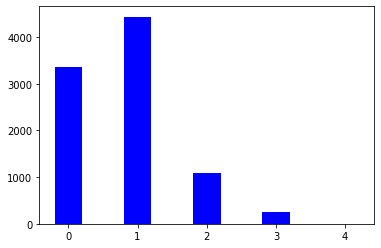

In [ ]:
test_df.insert(len(test_df.columns), 'Age_Tensor_Id', age_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Age_Probability', age_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_age_vindr_peds_test.csv')
age_labels = mimic_age_model.dls.vocab.o2i.keys()
prediction_counts = [age_preds[2].tolist().count(0), age_preds[2].tolist().count(1), age_preds[2].tolist().count(2), age_preds[2].tolist().count(3), age_preds[2].tolist().count(4)]
plt.bar(age_labels, prediction_counts, color ='blue',
        width = 0.4)
print(np.array(prediction_counts)/len(age_preds[2]))

CheXpert Age Validation on VinDr-PCXR Dataset

In [ ]:
test_df = pd.read_csv('/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/vinDR_peds_labels.csv')
test_df['Path'] = 'vinDR_PCXR_Peds_Chest_X-Ray_Data/' + test_df['Path'].astype(str)
chexpert_age_model = load_learner('/content/chexpert_age.pkl')
chexpert_age_model.dls.to(device='cuda')
chexpert_age_model.model.to(device='cuda')
age_test_dl = chexpert_age_model.dls.test_dl(test_df)
age_preds = chexpert_age_model.get_preds(dl=age_test_dl, with_decoded=True)
chexpert_age_model.dls.vocab.o2i

{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4}

                                                                       Path  \
0     vinDR_PCXR_Peds_Chest_X-Ray_Data/000295d6ff55184f19d99e95f93c3a55.jpg   
1     vinDR_PCXR_Peds_Chest_X-Ray_Data/0008e7acbcdf2fedd05cc236e5594074.jpg   
2     vinDR_PCXR_Peds_Chest_X-Ray_Data/000f60ed28579e82c402b99fcff67ef5.jpg   
3     vinDR_PCXR_Peds_Chest_X-Ray_Data/0018c771a8e8c20e6d7d5bc8e64181b4.jpg   
4     vinDR_PCXR_Peds_Chest_X-Ray_Data/001c350dcc2ecc107afb19512f33b927.jpg   
...                                                                     ...   
9120  vinDR_PCXR_Peds_Chest_X-Ray_Data/fef268e6a11bd1d8afd467637a9be995.jpg   
9121  vinDR_PCXR_Peds_Chest_X-Ray_Data/ff3e527e8c2514dd7afff6ed0fddef4c.jpg   
9122  vinDR_PCXR_Peds_Chest_X-Ray_Data/ff41e5847ab5cd928c2ade1c18bfa067.jpg   
9123  vinDR_PCXR_Peds_Chest_X-Ray_Data/ff74cc4098b6a2ad94597078b211a69e.jpg   
9124  vinDR_PCXR_Peds_Chest_X-Ray_Data/ff9c3524b745308c2e1e4167839ea759.jpg   

     Sex   Age  Age_Tensor_Id  \
0      F  006M    

<BarContainer object of 5 artists>

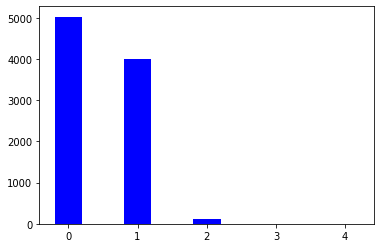

In [ ]:
test_df.insert(len(test_df.columns), 'Age_Tensor_Id', age_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Age_Probability', age_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_age_vindr_peds_test.csv')
age_labels = chexpert_age_model.dls.vocab.o2i.keys()
prediction_counts = [age_preds[2].tolist().count(0), age_preds[2].tolist().count(1), age_preds[2].tolist().count(2), age_preds[2].tolist().count(3), age_preds[2].tolist().count(4)]
plt.bar(age_labels, prediction_counts, color ='blue',
        width = 0.4)

NIH Age Validation on VinDr-PCXR Dataset

In [ ]:
test_df = pd.read_csv('/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/vinDR_peds_labels.csv')
test_df['Path'] = '/content/vinDR_PCXR_Peds_Chest_X-Ray_Data/' + test_df['Path'].astype(str)
nih_age_model = load_learner('/content/nih_age.pkl')
nih_age_model.dls.to(device='cuda')
nih_age_model.model.to(device='cuda')
age_test_dl = nih_age_model.dls.test_dl(test_df)
age_preds = nih_age_model.get_preds(dl=age_test_dl, with_decoded=True)
nih_age_model.dls.vocab.o2i

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

                                                                                Path  \
0     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000295d6ff55184f19d99e95f93c3a55.jpg   
1     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0008e7acbcdf2fedd05cc236e5594074.jpg   
2     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/000f60ed28579e82c402b99fcff67ef5.jpg   
3     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/0018c771a8e8c20e6d7d5bc8e64181b4.jpg   
4     /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/001c350dcc2ecc107afb19512f33b927.jpg   
...                                                                              ...   
9120  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/fef268e6a11bd1d8afd467637a9be995.jpg   
9121  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff3e527e8c2514dd7afff6ed0fddef4c.jpg   
9122  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff41e5847ab5cd928c2ade1c18bfa067.jpg   
9123  /content/vinDR_PCXR_Peds_Chest_X-Ray_Data/ff74cc4098b6a2ad94597078b211a69e.jpg   
9124  /content/vinDR_PCXR_Peds_C

<BarContainer object of 5 artists>

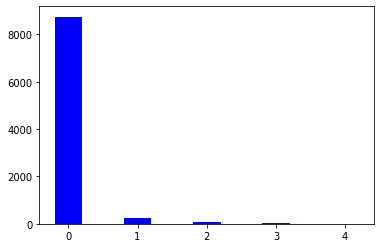

In [ ]:
test_df.insert(len(test_df.columns), 'Age_Tensor_Id', age_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Age_Probability', age_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/nih_age_vindr_peds_test.csv')
age_labels = nih_age_model.dls.vocab.o2i.keys()
prediction_counts = [age_preds[2].tolist().count(0), age_preds[2].tolist().count(1), age_preds[2].tolist().count(2), age_preds[2].tolist().count(3), age_preds[2].tolist().count(4)]
plt.bar(age_labels, prediction_counts, color ='blue',
        width = 0.4)